## Decision Tree

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
kyp= pd.read_csv('kyphosis.csv')
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
X = kyp.drop('Kyphosis', axis = 1)
y = kyp['Kyphosis']

In [81]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=4)
# x_train, x_test, y_train, y_test

In [157]:
# Fitting model DT
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [158]:
dt_pred = dtree.predict(x_test)
dt_pred

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [159]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

    accuracy                           0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25



In [160]:
# Another method of evaluation
confusion_matrix(y_test, dt_pred)

array([[20,  1],
       [ 3,  1]])

In [161]:
accuracy_percentage = 21/25
accuracy_percentage

0.84

In [162]:
# Another method of evaluation
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, dt_pred))

DecisionTrees's Accuracy:  0.84


#### Visualization

In [163]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

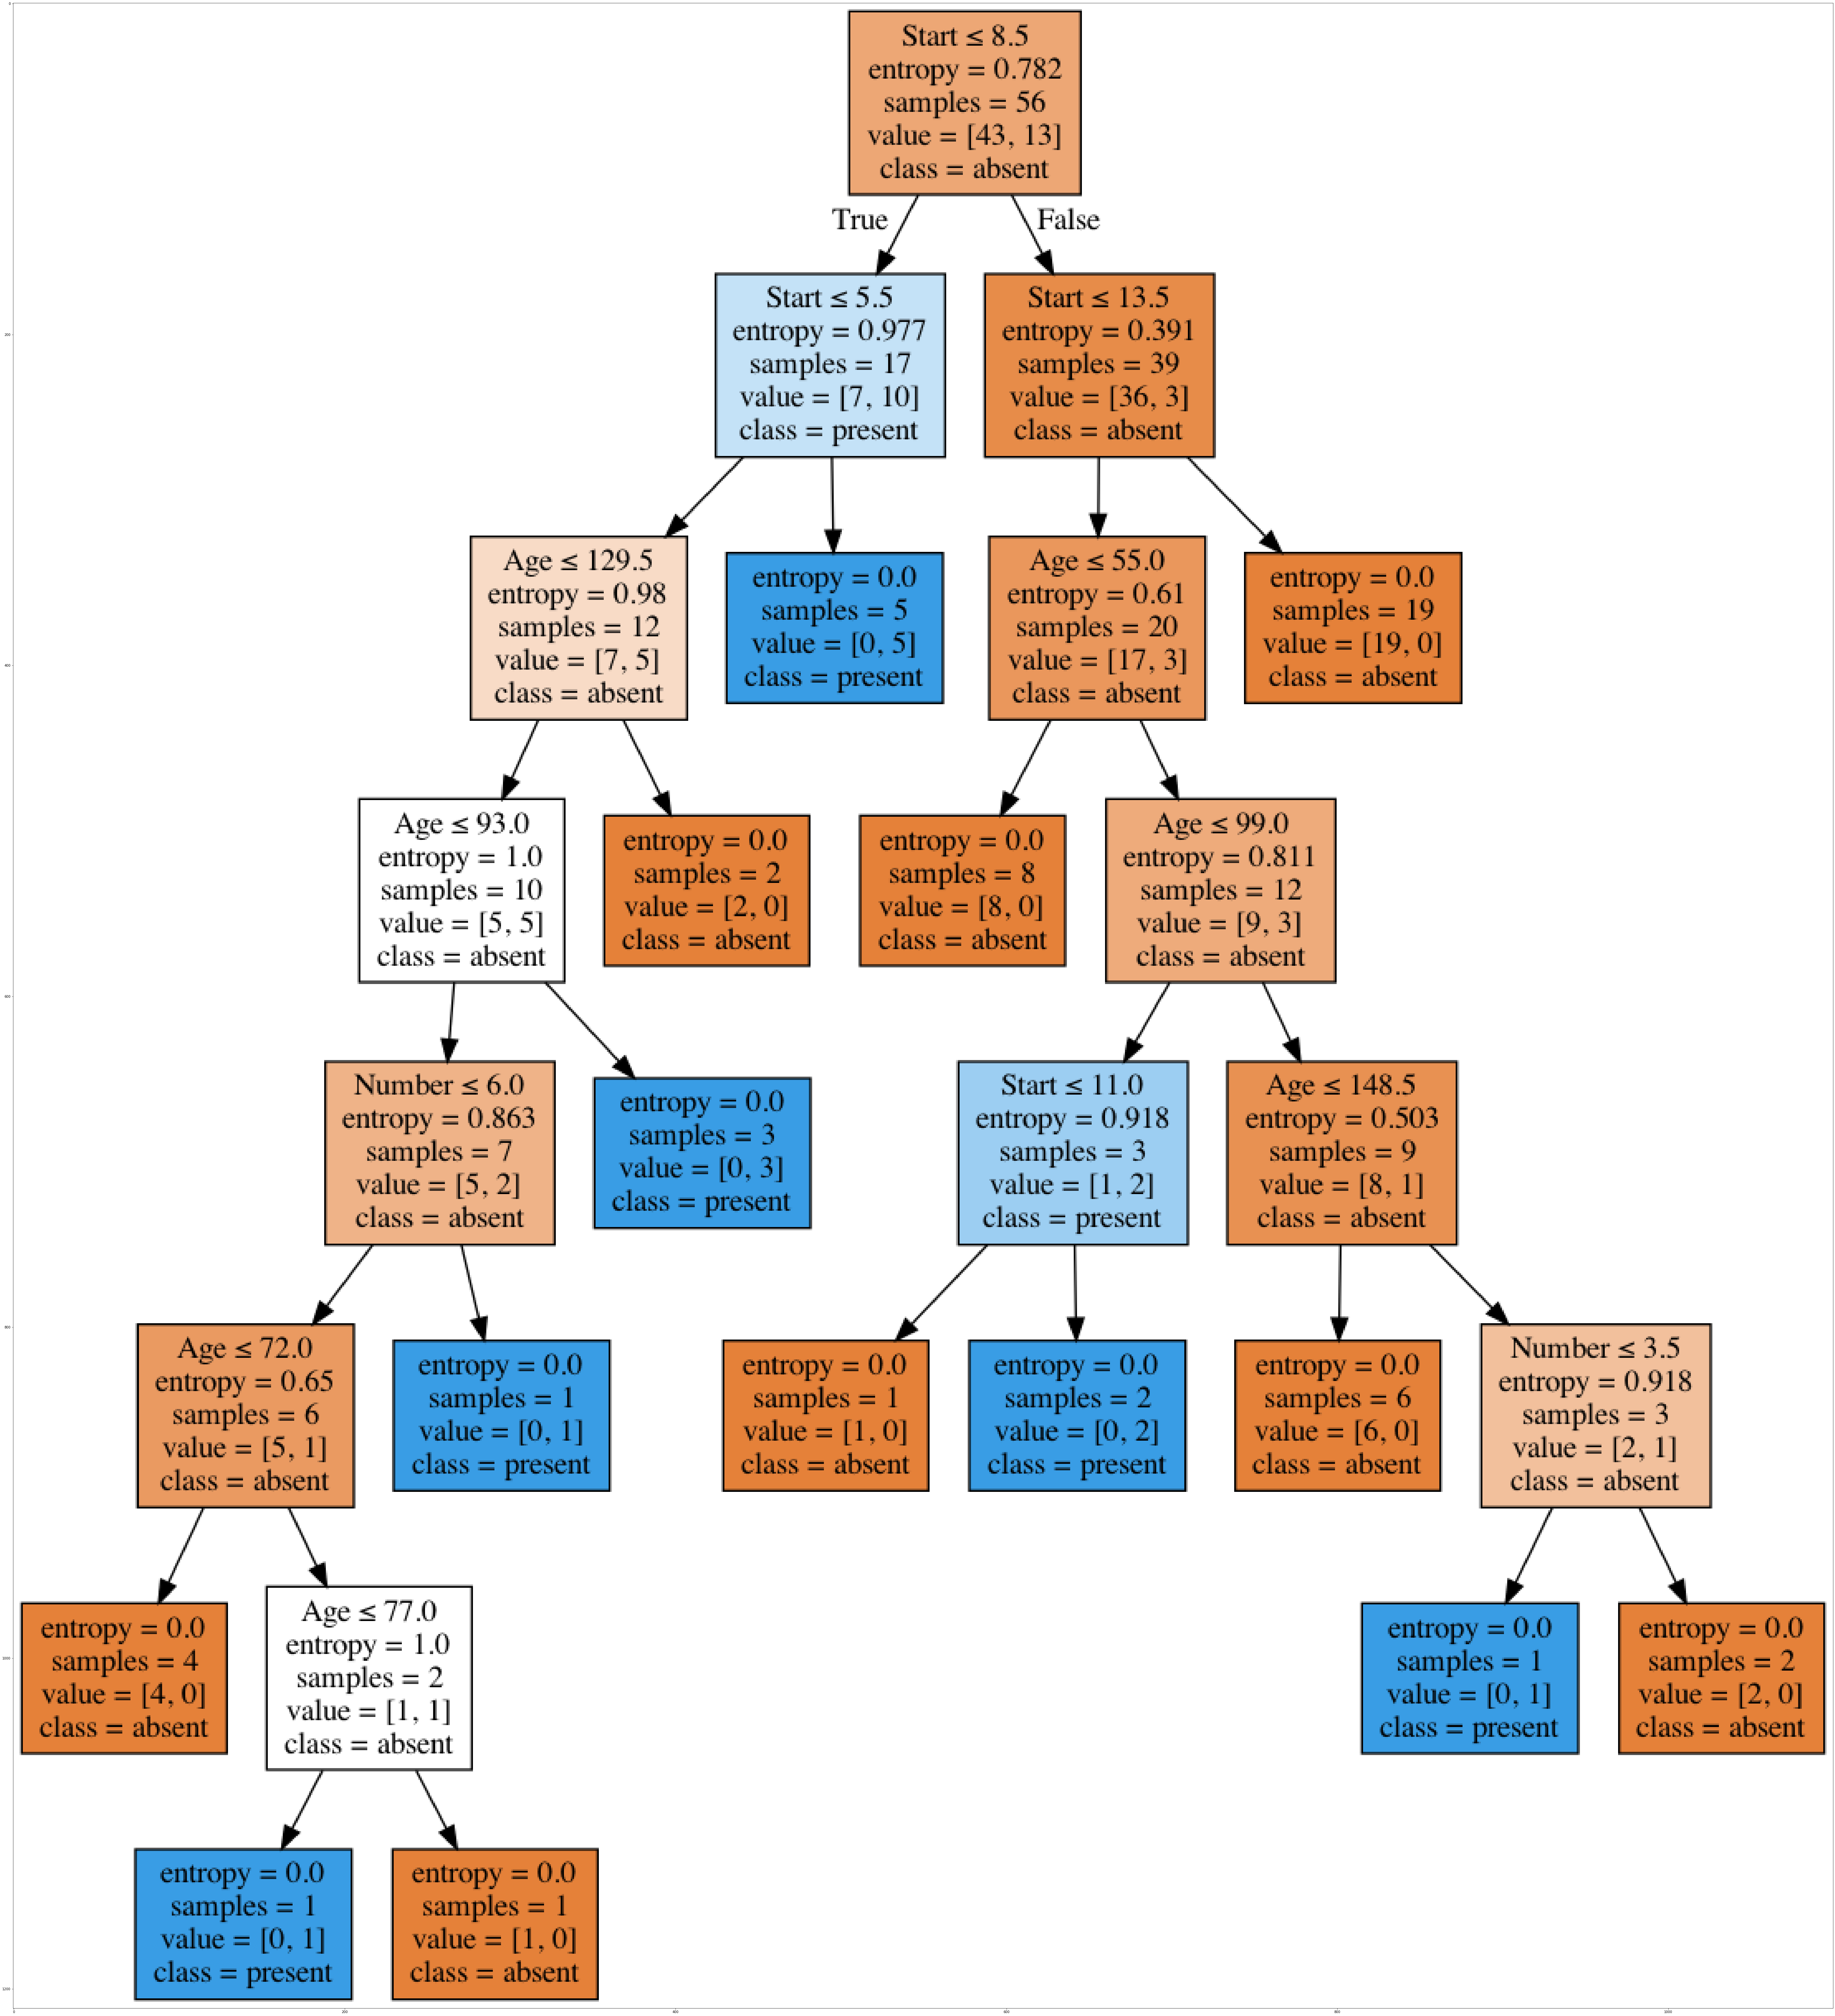

In [164]:
dot_data = StringIO()
filename = "kyphosis.png"
featureNames = kyp.columns[1:4]
targetNames = kyp["Kyphosis"].unique().tolist()
out=tree.export_graphviz(dtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

### Another data

In [172]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [173]:
drug = pd.read_csv("drug200.csv", delimiter=",")
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [174]:
# Preprocessing
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
drug.iloc[:,1] = le_sex.transform(drug.iloc[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
drug.iloc[:,2] = le_BP.transform(drug.iloc[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
drug.iloc[:,3] = le_Chol.transform(drug.iloc[:,3]) 

drug.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
5,22,0,2,0,8.607,drugX
6,49,0,2,0,16.275,drugY
7,41,1,1,0,11.037,drugC
8,60,1,2,0,15.171,drugY
9,43,1,1,1,19.368,drugY


In [181]:
X = drug.drop('Drug', axis = 1)
y = drug['Drug']

In [200]:
# Spliting the data into train and test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=3)
# x_train, x_test, y_train, y_test

In [201]:
# Fitting model DT
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [202]:
dt_pred = dtree.predict(x_test)
dt_pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [203]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [204]:
# Another method of evaluation
confusion_matrix(y_test, dt_pred)

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 22]])

In [207]:
accuracy_percentage = 59/60
accuracy_percentage

0.9833333333333333

In [206]:
# Another method of evaluation
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, dt_pred))

DecisionTrees's Accuracy:  0.9833333333333333


In [208]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

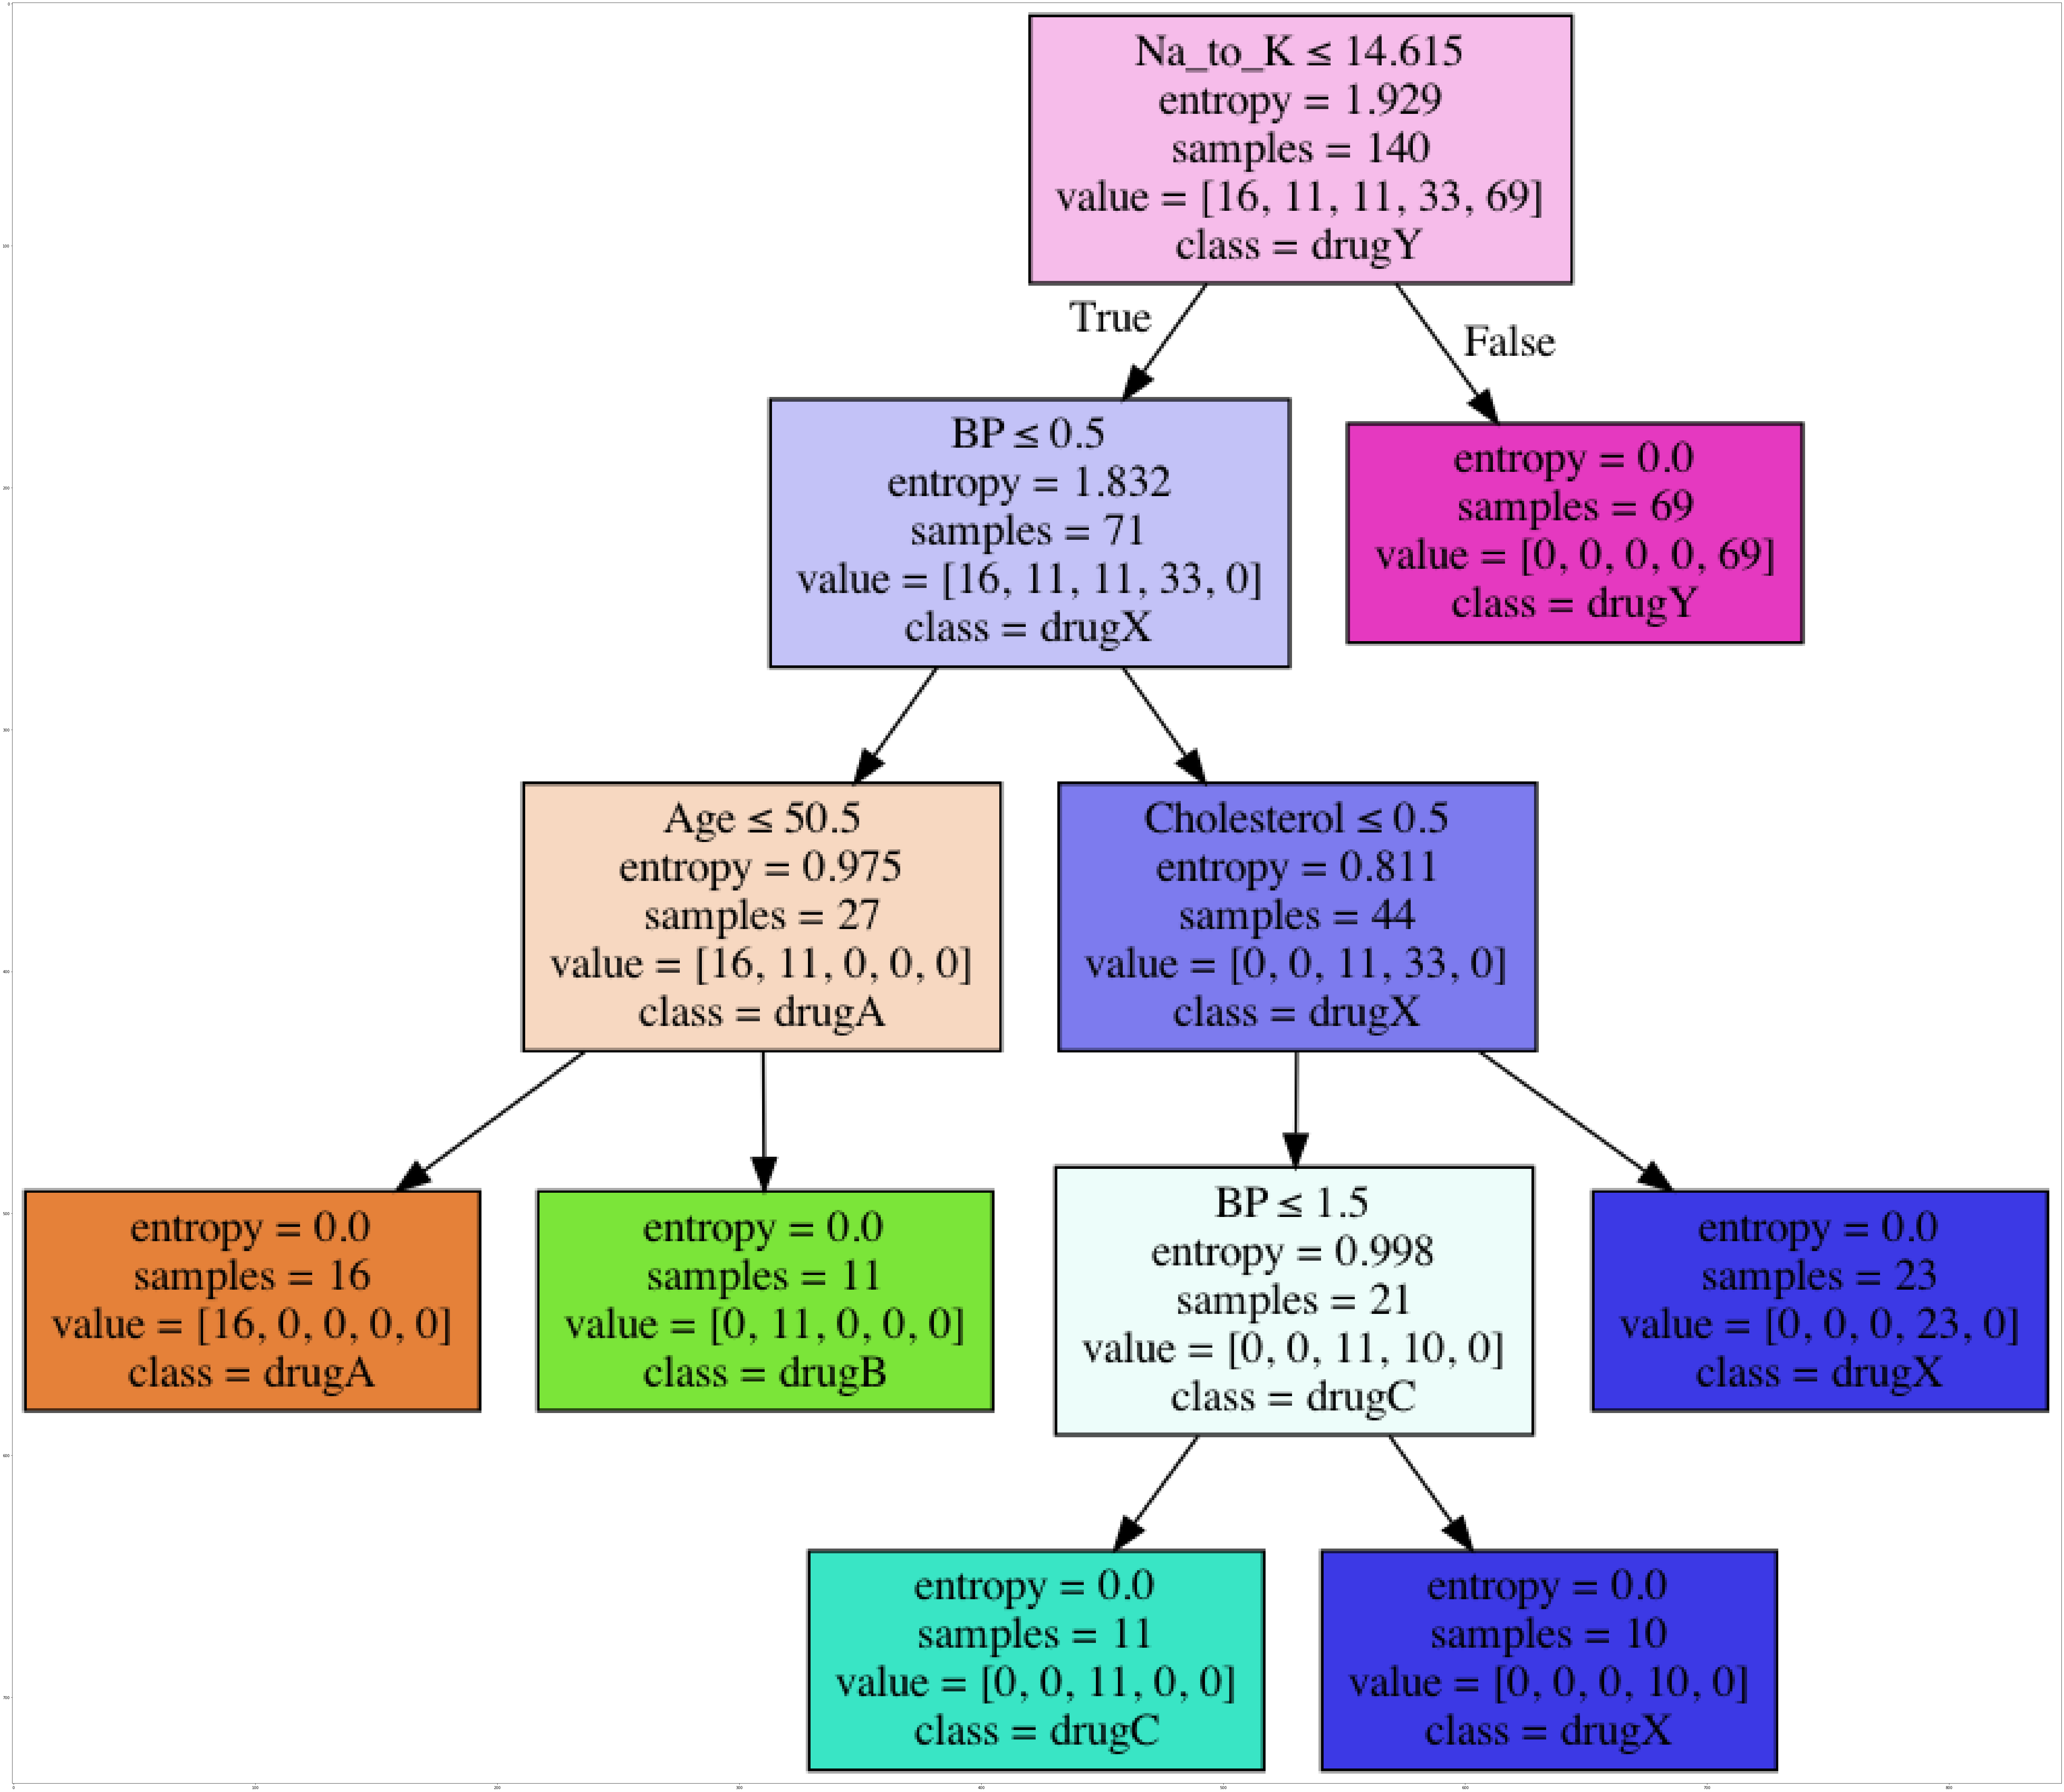

In [209]:
dot_data = StringIO()
filename = "drug.png"
featureNames = drug.columns[0:5]
targetNames = drug["Drug"].unique().tolist()
out=tree.export_graphviz(dtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')